# G08 Thêm chữ và tô màu

## Mục đích

Trước khi đi vào các ví dụ, chúng ta sẽ tìm hiểu nốt hai chi tiết đồ họa thường gặp trong biểu đồ: chữ (text) và tô màu (fill).


## Thêm chữ vào biểu đồ

Trong Matplotlib bạn có thể thêm chữ bằng hàm `text()` hoặc `annotate()`. Trong khi hàm `text()` cung cấp tính năng thêm chữ nói chung, hàm `annotate()` được sử dụng cụ thể cho chữ gắn liền với một chi tiết đồ họa khác (ví dụ, một chấm) trên biểu đồ. Do chúng ta thường thêm chữ để chú thích các hình trong biểu đồ, chúng ta sẽ sử dụng hàm `annotate()` là chủ yếu.

Hình vẽ dưới đây là đồ thị hàm số $y=x^2 - 2x + 2$. Điểm cực tiểu của nó là $M(1,1)$. Chúng ta sẽ chú thích điểm M này trên đồ thị.

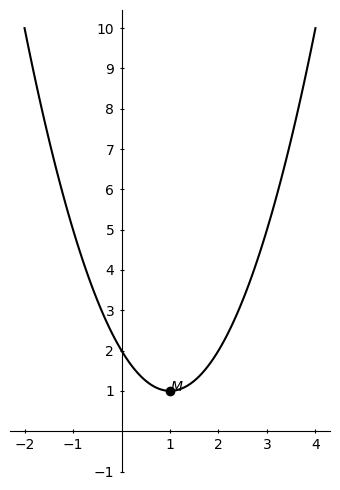

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-2, 4, 101, endpoint=True)
Y = (X - 1)**2 + 1
y_min = np.min(Y)
x_min = X[np.where(Y == y_min)][0]

def plot_graph() -> plt.Axes:
    fig, ax = plt.subplots(figsize=(3.5, 5), tight_layout=True)
    ax.plot(X, Y, "-k", lw=1.5)
    ax.plot(x_min, y_min, "ok")

    ax.set_xticks([-2, -1, 1, 2, 3, 4])
    ax.set_yticks([-1] + list(range(1, 11)))

    ax.tick_params(axis="both", direction="inout")
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["left", "bottom"]].set_position("zero")

    return ax


ax = plot_graph()

# Chú ý vào dòng này
ax.annotate("$M$", (x_min, y_min))

plt.show()

Như bạn thấy, chúng ta đã thêm điểm $M$ vào trong đồ thị của hàm số này. Tuy nhiên, chữ M nằm ở một vị trí khó nhìn. Chúng ta muốn nó nằm dưới chấm ở tọa độ (1, 1) và cách xa chấm này một chút, ví dụ 0.2 đơn vị.

Chúng ta sẽ tìm hiểu cách mà `annotate()` quy định vị trí của chữ trên biểu đồ. Chúng ta vừa thiết lập đối số `xy=(x_min, y_min)`. Mặc định, đây sẽ là vị trí góc trái dưới của chữ mà chúng ta thêm vào. Hãy thử để nó ở `(x_min - .15, y_min - .5)`.

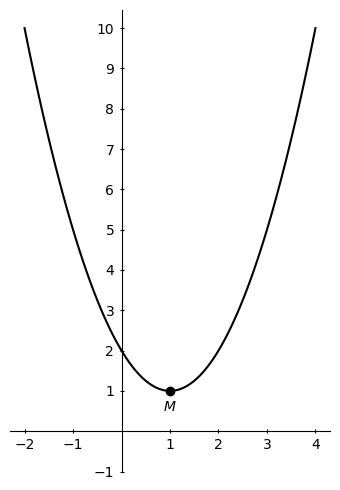

In [2]:
ax = plot_graph()
ax.annotate("$M$", xy=(x_min - .15, y_min - .5))
plt.show()

Điểm M có vẻ nằm ở vị trí "đẹp" mà chúng ta mong muốn rồi. Nhưng tại sao lại là 0.15 và 0.5? Thật ra những con số đó là dựa trên sự quan sát vị trí và kích thước điểm M ban đầu của chúng ta. Khi chúng ta thay đổi các thông số, ví dụ kích thước font chữ, những giá trị trên có thể không còn đúng nữa.

Chúng ta muốn một cách nào đó mà chữ tự động căn giữa theo trục ngang, và thay vì nằm trên thì nằm dưới chấm (1, 1). Chúng ta sẽ dùng đối số `ha` (horizontal alignment) và `va` (vertical aligment). Bạn có thể xem thêm về căn chữ ở [đây](https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_alignment.html).

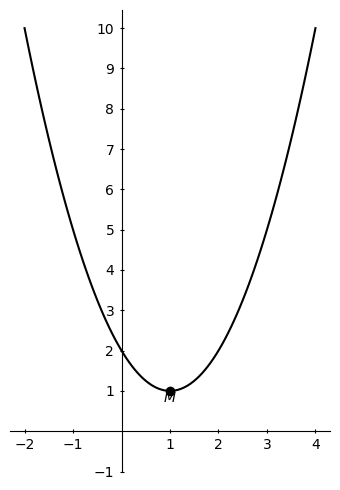

In [3]:
ax = plot_graph()
ax.annotate("$M$", (x_min, y_min), ha="center", va="top")
plt.show()

Gần được rồi, giờ chúng ta chỉ còn dịch xuống dưới 0.2 đơn vị nữa là ổn. Bạn có thể thiết lập đối số `xy=(x_min, y_min -.2)`.

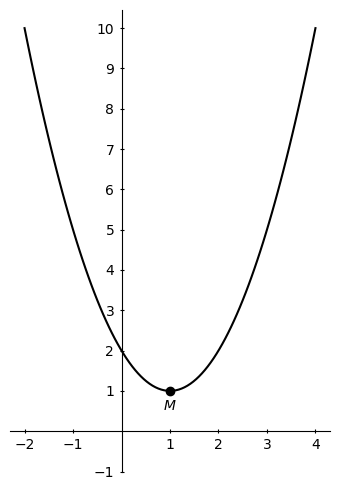

In [4]:
ax = plot_graph()
ax.annotate("$M$", (x_min, y_min - .2), ha="center", va="top")
plt.show()

Bây giờ chúng ta muốn thêm cụm từ "cực tiểu" ở phía bên phải chữ M và có một mũi tên chỉ về chữ M. Ví dụ kiểu như thế này.

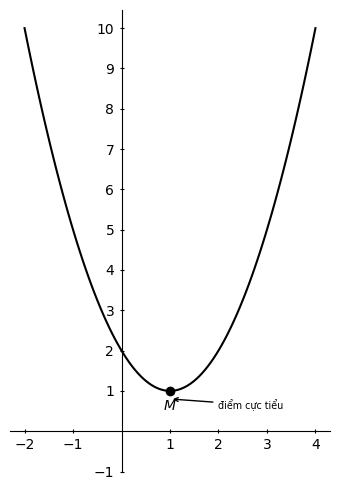

In [5]:
ax = plot_graph()
ax.annotate("$M$", (x_min, y_min - .2), ha="center", va="top")
ax.annotate("điểm cực tiểu", (x_min, y_min -.2), (x_min + 1, y_min - .2), va="top", fontsize="x-small",
    arrowprops={"arrowstyle": "->"})
plt.show()

Tuy nhiên, chúng ta không hài lòng về mũi tên này. Trước hết, hãy chuyển đổi hệ tọa độ của biểu đồ sang hệ tọa độ mà gốc tọa độ là chữ M bằng cách thiết lập đối số `xycoords` của dòng chữ "điểm cực tiểu".

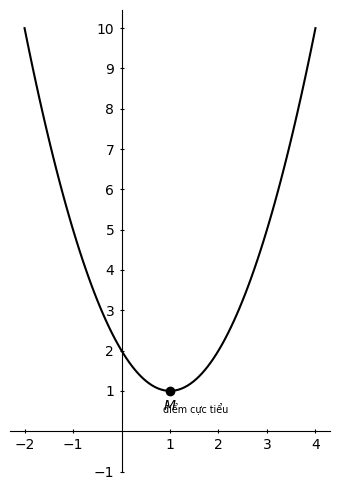

In [6]:
ax = plot_graph()
point_m = ax.annotate("$M$", (x_min, y_min - .2), ha="center", va="top")
ax.annotate("điểm cực tiểu", (0, 0), xycoords=point_m, fontsize="x-small")
plt.show()

Cụm từ "điểm cực tiểu" bắt đầu ở góc trái dưới của chữ M. Đây là vị trí tương ứng với tọa độ (0, 0) mà chúng ta cung cấp cho đối số `xy`. Hãy thử con số (1, .5) nhé.

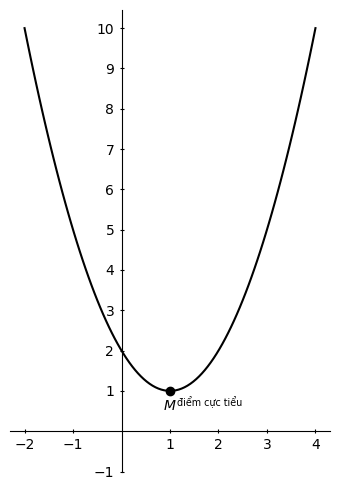

In [7]:
ax = plot_graph()
point_m = ax.annotate("$M$", (x_min, y_min - .2), ha="center", va="top")
ax.annotate("điểm cực tiểu", (1, .5), xycoords=point_m, fontsize="x-small")
plt.show()

Lúc này, dòng chữ "điểm cực tiểu" nằm ở ranh giới bên phải của chữ M, và có vẻ theo chiều dọc thì bắt đầu ở giữa chữ M. Khác với hệ tọa độ của biểu đồ, hệ tọa độ lấy chữ M (chúng ta gọi là một `Artist`) làm gốc lại là chiếc "khung" bao quanh chữ M. Vị trí (0, 0) là góc trái dưới, vị trí (1, 1) là góc phải trên.

Kể từ vị trí "gốc" này, chúng ta có thể di chuyển dòng chữ "điểm cực tiểu" đi bao xa tùy ý. Và chúng ta sẽ căn giữa dòng chữ này theo chiều dọc.

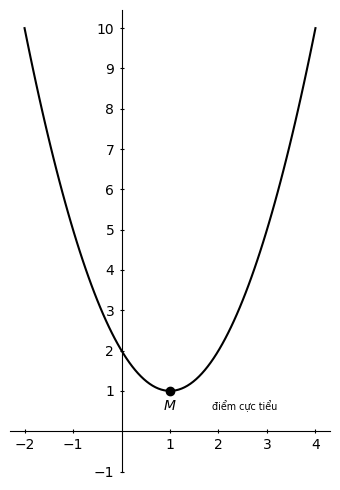

In [8]:
ax = plot_graph()
point_m = ax.annotate("$M$", (x_min, y_min - .2), ha="center", va="top")
ax.annotate("điểm cực tiểu", (1, .5), xycoords=point_m, xytext=(25, 0), textcoords="offset points", fontsize="x-small", va="center")
plt.show()

Trong ví dụ trên đây, bạn sẽ thấy mình sử dụng hai tọa độ khác nhau. Tọa độ trong đối số `xy=(1, .5)` có thể xem là tọa độ gốc của dòng chữ (xuất phát từ mép phải và vị trí chính giữa theo chiều dọc của khung chữ M). Kể từ đó, chúng ta sẽ di chuyển 25 chấm sang phải và 0 chấm đi lên (đối số `xytext=(25, 0)`); chúng ta sử dụng hệ tọa độ `textcoords="offset points"` cho việc này.

Giờ chúng ta sẽ vẽ mũi tên. Để vẽ mũi tên, bạn cần thiết lập điểm đầu và điểm cuối của mũi tên, mình đã làm việc này trong ví dụ phía trước bằng cách thiết lập `xy` và `xytext`. Chúng ta cần phải cung cấp thông tin cho đối số `arrowprops`. Xem thêm thông tin về arrowprops ở [đây](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate) và cách sử dụng ở [đây](https://matplotlib.org/stable/tutorials/text/annotations.html#annotating-with-arrow).

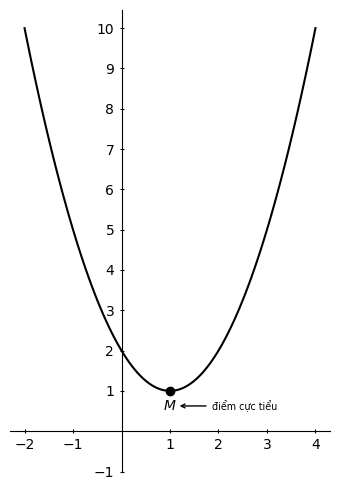

In [9]:
ax = plot_graph()
point_m = ax.annotate("$M$", (x_min, y_min - .2), ha="center", va="top")
ax.annotate("điểm cực tiểu", (1, .5), xycoords=point_m, xytext=(25, 0), textcoords="offset points",
    fontsize="x-small", va="center", arrowprops={"arrowstyle": "->"})
plt.show()

### Thiết lập định dạng chữ

Chúng ta chưa bao giờ đề cập đến định dạng chữ. Trong bài này, mình sẽ giới thiệu một số cách điều chỉnh định dạng chữ thường dùng trong Matplotlib. Thông tin cụ thể về các thuộc tính liên quan tới định dạng chữ, bạn có thể xem ở [đây](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text).

Quay lại với ví dụ ở trên, bạn đã thấy mình điều chỉnh kích thước dòng chữ "điểm cực tiểu" bằng đối số `fontsize="x-small"`. Ngoài ra, bạn có thể thay đổi font, đậm nhạt, in nghiêng, và nhiều định dạng khác.

Giờ chúng ta sẽ thử in đậm và sử dụng font Arial cho chữ M. Hiện tại chúng ta đang để chữ M trong cặp dấu đô-la (`$`). Cặp dấu này là kí hiệu trong LaTeX, đại diện cho định dạng chữ toán học. Để thấy được sự thay đổi về định dạng, chúng ta sẽ bỏ cặp dấu này.

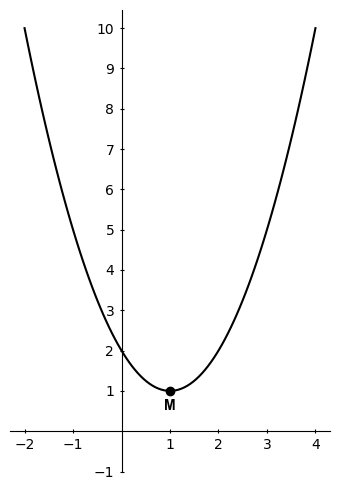

In [10]:
ax = plot_graph()
point_m = ax.annotate("M", (x_min, y_min - .2), ha="center", va="top", fontfamily="Arial", fontweight="bold")
plt.show()

Bạn có thể thay đổi toàn bộ font chữ của tất cả các biểu đồ và chi tiết trong biểu đồ bằng một thiết lập trong Pyplot.

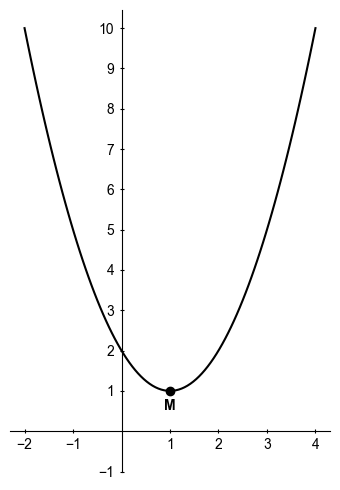

In [11]:
old_font_family = plt.rcParams["font.family"]
plt.rcParams["font.family"] = "Arial"

ax = plot_graph()
point_m = ax.annotate("M", (x_min, y_min - .2), ha="center", va="top", fontweight="bold")
plt.show()

Tất cả các đối tượng chữ đều có thể thiết lập được định dạng. Ví dụ tên biểu đồ.

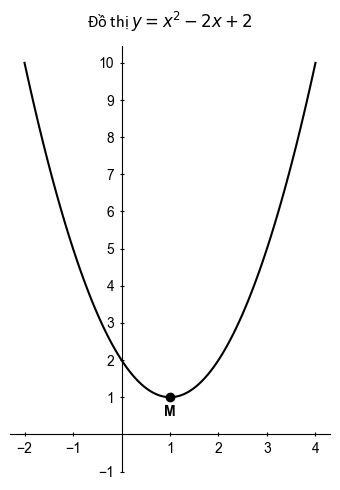

In [12]:
ax = plot_graph()
point_m = ax.annotate("M", (x_min, y_min - .2), ha="center", va="top", fontweight="bold")
ax.set_title("Đồ thị $y=x^2 - 2x + 2$", fontdict={"fontfamily": "Calibri"}, pad=13)
plt.show()

### Khung chữ

Hàm `text()` và `annotate()` có đối số `bbox` cho phép chúng ta vẽ khung bao quanh chữ. Xem thêm hướng dẫn ở [đây](https://matplotlib.org/stable/tutorials/text/annotations.html#annotating-with-text-with-box) và [đây](https://matplotlib.org/stable/gallery/shapes_and_collections/fancybox_demo.html).

Chúng ta sẽ thử sử dụng hàm `text()` lần đầu tiên trong tutorial này. Cú pháp của hàm này đơn giản hơn `annotate()` nhiều.

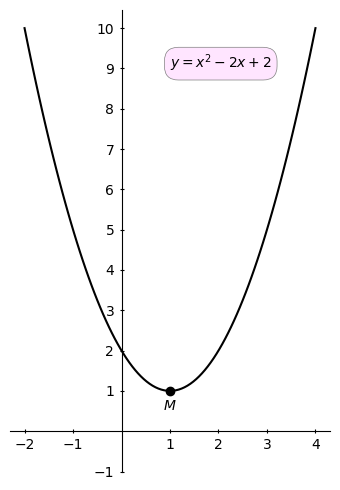

In [13]:
plt.rcParams["font.family"] = old_font_family

bbox_style = {
    "boxstyle": "round,pad=0.4,rounding_size=1",
    "ec": "gray",
    "fc": "#ffe5ff",
    "lw": .5
}

ax = plot_graph()
ax.annotate("$M$", (x_min, y_min - .2), ha="center", va="top")
ax.text(1, 9, "$y=x^2 - 2x + 2$", bbox=bbox_style)

plt.show()

Và bây giờ thêm cùng khung chữ nói trên cho dòng chữ "điểm cực tiểu".

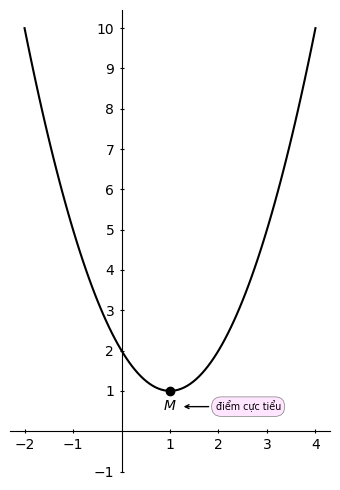

In [14]:
ax = plot_graph()
ax.annotate("$M$", (x_min, y_min - .2), ha="center", va="top")
ax.annotate("điểm cực tiểu", (1, .5), xycoords=point_m, xytext=(25, 0), textcoords="offset points",
    fontsize="x-small", va="center", arrowprops={"arrowstyle": "->"}, bbox=bbox_style)
plt.show()

## Tô màu

Trước khi tô màu, chúng ta sẽ vẽ thêm một đường thẳng song song với trục hoành $y=8$.

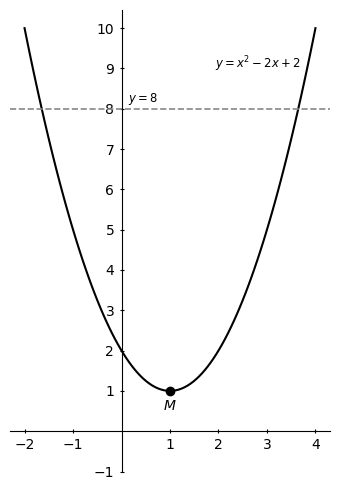

In [15]:
ax = plot_graph()
ax.annotate("$M$", (x_min, y_min - .2), ha="center", va="top")
ax.annotate("$y=x^2 - 2x + 2$", (3.7, 9), ha="right", fontsize="small")
# Thêm đường thẳng y=8
ax.axhline(8, color="#888", ls="--", lw=1.2)
ax.annotate("$y=8$", (0, 8), xytext=(5, 5), textcoords="offset points", fontsize="small")
plt.show()

Bây giờ chúng ta sẽ tô màu cho vùng bên trong được bao bởi đồ thị parabol, đường thẳng ngang mà chúng ta vừa vẽ, và trục tung. Pyplot cung cấp hàm `fill()` và `fill_between()` cho việc tô màu. Ở đây chúng ta sẽ dùng hàm `fill_between()` để tô màu vì có các giới hạn trái-phải trên-dưới.

Giới hạn trái và phải của hàm `fill_between()` được quy định trong đối số `x`, là một danh sách các vị trí theo trục X sẽ được tô màu. Như vậy, trên thực tế, Pyplot không tô màu từ vị trí X nhỏ nhất đến X lớn nhất, mà sẽ tô màu những vị trí X được quy định trong danh sách này. Để đảm bảo vùng tô màu của bạn được liên tục, bạn nên tạo danh sách với các giá trị X khá là sát nhau (ví dụ, cách nhau 0.05 đơn vị).

Giới hạn trên và dưới là các vị trí theo trục Y, cũng là một danh sách với cùng kích thước của X. Hãy xem đoạn code dưới đây để xem cách chúng ta sẽ lọc ra các tọa độ Y của đường cong parabol.

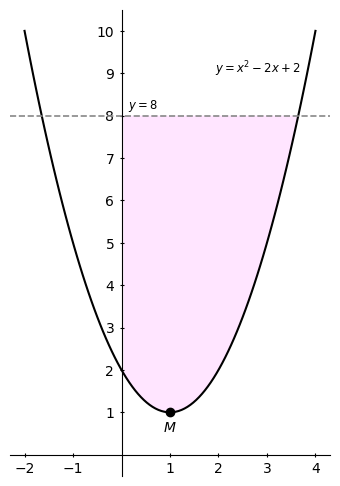

In [16]:
ax = plot_graph()
ax.annotate("$M$", (x_min, y_min - .2), ha="center", va="top")
ax.annotate("$y=x^2 - 2x + 2$", (3.7, 9), ha="right", fontsize="small")
ax.axhline(8, color="#888", ls="--", lw=1.2)
ax.annotate("$y=8$", (0, 8), xytext=(5, 5), textcoords="offset points", fontsize="small")

## Tô màu

# Lọc các giá trị X và Y nằm trong giới hạn trái (x=0)
# và phải (giao giữa đường parabol và đường thẳng y=8)
X_fill = X[np.where((X > 0) & (Y <= 8))]
Y_min_fill = Y[np.where((X > 0) & (Y <= 8))]
Y_max_fill = [8] * len(X_fill)

# Bắt đầu tô màu
ax.fill_between(X_fill, Y_min_fill, Y_max_fill, fc="#ffe5ff")

ax.set_yticks(list(range(1, 11)))
ax.set_ylim(-.5, 10.5)

plt.show()

---

[Bài trước](./07_subplots.ipynb) - [Danh sách bài](../README.md) - [Bài sau]()